In [1]:
import petpal.input_function.idif_necktangle as idif
import nibabel
import ants
import numpy
import seaborn as sns

In [2]:
angio = ants.image_read('/data/norris/data1/data_archive/VATDYS/sub-VATDYS046/anat/sub-VATDYS046_angio.nii.gz')
mpr = ants.image_read('/export/scratch1/Registration/VATDYS/sub-VATDYS046/sub-VATDYS046_mpr.nii')
pet = ants.image_read('/export/scratch1/PETPAL/06Nov24/sub-VATDYS046/sub-VATDYS046_reg.nii.gz')

angio_mpr = ants.registration(
    fixed=mpr,
    moving=angio,
    type_of_transform='Rigid'
)

ants.image_write(angio_mpr['warpedmovout'],'/export/scratch1/vatdys_idif/angio_space-mpr.nii.gz')

In [3]:
necktangle_mask = ants.image_read('/export/scratch1/vatdys_idif/necktangle_mask_ex1.nii.gz')

In [25]:
result1 = idif.single_threshold_idif_from_4d_pet_with_necktangle(
    pet_4d_data=pet.numpy(),
    carotid_necktangle_mask_3d_data=necktangle_mask.numpy(),
    percentile=90,
    bolus_start_frame=3,
    bolus_end_frame=7
)

In [26]:
result2 = idif.single_threshold_idif_from_4d_pet_with_necktangle(
    pet_4d_data=pet.numpy(),
    carotid_necktangle_mask_3d_data=necktangle_mask.numpy(),
    percentile=90,
    bolus_start_frame=3,
    bolus_end_frame=9
)

In [27]:
tac1, mask1 = result1
tac2, mask2 = result2

<Axes: >

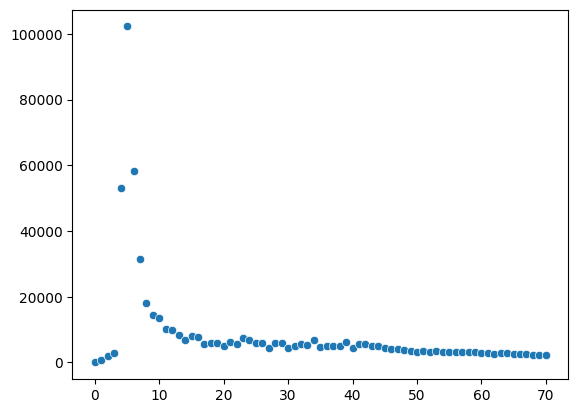

In [28]:
sns.scatterplot(x=range(len(tac1)),y=tac1)

<Axes: >

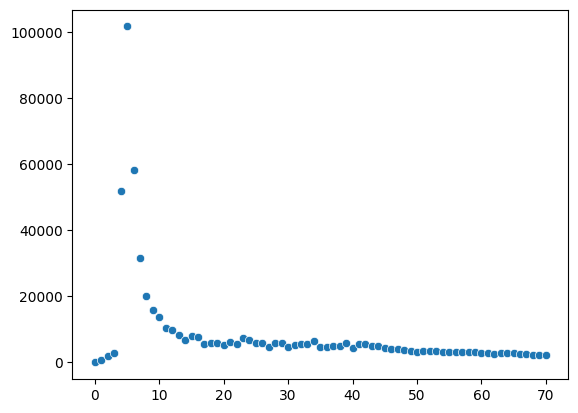

In [29]:
sns.scatterplot(x=range(len(tac2)),y=tac2)

In [30]:
necktangle_nibabel = nibabel.load('/export/scratch1/vatdys_idif/necktangle_mask_ex1.nii.gz')
mask2img = nibabel.Nifti1Image(dataobj=mask2,affine=necktangle_nibabel.affine,header=necktangle_nibabel.header)
nibabel.save(mask2img,'/export/scratch1/vatdys_idif/bolus_mask2.nii.gz')